In [ ]:
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

In [ ]:
train_l=pd.read_csv('train_labels.csv')

In [ ]:
train_l.columns

In [ ]:
class_1=train_l.loc[train_l['target'] == 1]
class_0=train_l.loc[train_l['target'] == 0]

In [ ]:
class_1

In [ ]:
class_0

In [ ]:
import shutil

for i in class_1.index:
    shutil.move("./images/"+class_1.at[i, "image"],"./1/"+class_1.at[i, "image"])
    


In [ ]:

for i in class_0.index:
    shutil.move("./images/"+class_0.at[i, "image"],"./0/"+class_0.at[i, "image"])

In [12]:
import pathlib


data_dir = pathlib.Path("./data_dir")
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)
unmask = list(data_dir.glob('0/*'))
mask = list(data_dir.glob('1/*'))



1326


In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 32
img_height = 480
img_width = 480

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print(class_names)



Found 1324 files belonging to 2 classes.
Using 1060 files for training.
Found 1324 files belonging to 2 classes.
Using 264 files for validation.
['0', '1']


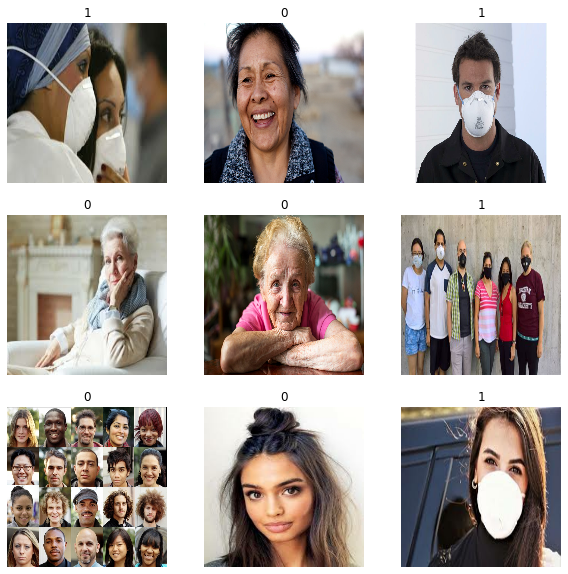

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 480, 480, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [17]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [19]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),

  layers.Dense(num_classes)
])


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 480, 480, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 480, 480, 512)     14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 240, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 256)     1179904   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 256)     0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 256)     0         
_________________________________________________________________
flatten (Flatten)            (None, 3686400)           0

In [22]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/3


ResourceExhaustedError:  OOM when allocating tensor with shape[32,480,480,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential/conv2d/Relu (defined at <ipython-input-22-68ab5649580a>:5) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_1162]

Function call stack:
train_function


In [ ]:
from tensorflow.keras.applications.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
sub=pd.read_csv('sample_sub_v2.csv')
data_dir_sub = pathlib.Path("./imagesVal")


In [ ]:
img = tf.keras.preprocessing.image_dataset_from_directory(data_dir,image_size=(img_height, img_width))

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = img.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

In [ ]:
y=model.predict(normalized_ds)

In [ ]:
listName=[]
listClass=[]


for i in sub.index:
    imgs = tf.keras.preprocessing.image.load_img( "./imagesVal/"+sub.at[i, "image"] ,target_size=(img_height, img_width)
)
    img_array = keras.preprocessing.image.img_to_array(imgs)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    listName.append(sub.at[i, "image"])
    if score[0]>score[1]:
        listClass.append(1)
    else:
        listClass.append(0)

In [ ]:
listClass[1]

In [ ]:
listName[1]

In [9]:
sub_df=pd.DataFrame({'image':listName,'target':listClass})
sub_df.to_csv('MaskSub.csv',index=False)

NameError: name 'listName' is not defined

In [10]:
y[0][0]>y[0][1]

NameError: name 'y' is not defined

In [11]:
y

NameError: name 'y' is not defined